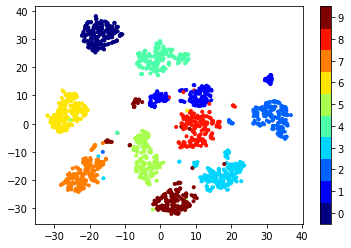

In [20]:
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt

digits = load_digits()
embeddings = TSNE(n_jobs=4).fit_transform(digits.data)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## 训练集-预训练特征可视化

In [34]:
import numpy as np
X_2d=np.load('./visual/train_tsne.npy')
print(X_2d.shape)
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
print(vis_x)
print(vis_y)

(17670, 2)
[ 24.14784   14.744015 -62.41597  ...  11.426296 -19.78781   27.815258]
[-11.49782   11.004161   9.767817 ... -21.868597  16.239952  45.99818 ]


In [35]:
target=np.load('train_labels.npy')[:,0]
print(target.shape)

(17670,)


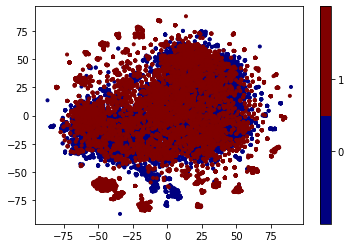

In [40]:
plt.scatter(vis_x, vis_y, c=target, cmap=plt.cm.get_cmap("jet", 2), marker='.')
plt.colorbar(ticks=range(2))
plt.clim(-1, 2)
plt.show()

## 训练集+测试集-预训练特征可视化

In [41]:
import numpy as np
X_2d=np.load('./visual/tsne.npy')
print(X_2d.shape)
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
print(vis_x)
print(vis_y)

(18637, 2)
[-17.95201     5.7163153 -50.328995  ... -19.944283   20.44265
 -22.591612 ]
[ 17.048714   12.7914295 -28.352264  ... -53.223457    7.9410133
 -28.736168 ]


In [47]:
target1=np.load('train_labels.npy')[:,0]
print(target1.shape)
target2=np.load('test_labels.npy')[:,0]
print(target2.shape)
target2=target2+2
target=np.concatenate([target1,target2],axis=0)
print(target.shape)

(17670,)
(967,)
(18637,)


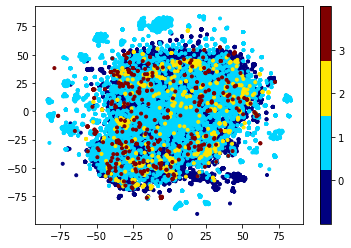

In [51]:
plt.scatter(vis_x, vis_y, c=target, cmap=plt.cm.get_cmap("jet", 4), marker='.')
plt.colorbar(ticks=range(4))
plt.clim(-1, 4)
plt.show()

## finetune特征可视化（并不能反映真实的可分性，但是一定程度上反映了）

## 1：提取特征
### 1.1: 训练集，测试集特征提取

In [2]:
import numpy as np
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model,Model

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession 
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
model = load_model('checkpoint-09e-val_accuracy_0.8825.hdf5')
model.summary()
vggmodel = Model(inputs=model.input, outputs=model.get_layer('flatten_1').output)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 20,025,410
Trainable params: 20,025,410
Non-trainable params: 0
_________________________________________________________________


In [21]:
name='4076f4f7a05d4e3c57ebee59e26d6bc9.png'
train_pictures_path='/home/yangtianyun/Data2/train_val/'
img = image.load_img(train_pictures_path+name, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
feature = vggmodel.predict(x)
print(feature.shape)

(1, 224, 224, 3)
(1, 512)


In [22]:
test_names=np.load('./names/train_names.npy',allow_pickle=True)
pbar = tqdm(total=len(test_names))
test_fea=[]
for names in test_names:
    pbar.update(1)
    img = image.load_img(train_pictures_path+names[0], target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    test_fea.append(feature)







  0%|          | 0/17670 [00:00<?, ?it/s]





  0%|          | 10/17670 [00:00<03:21, 87.47it/s]





  0%|          | 19/17670 [00:00<03:26, 85.48it/s]





  0%|          | 27/17670 [00:00<03:34, 82.18it/s]





  0%|          | 35/17670 [00:00<03:43, 78.77it/s]





  0%|          | 43/17670 [00:00<03:43, 78.99it/s]





  0%|          | 50/17670 [00:00<04:34, 64.29it/s]





  0%|          | 59/17670 [00:00<04:20, 67.48it/s]





  0%|          | 68/17670 [00:00<04:05, 71.68it/s]





  0%|          | 75/17670 [00:01<04:09, 70.44it/s]





  0%|          | 82/17670 [00:01<04:24, 66.58it/s]





  1%|          | 89/17670 [00:01<04:28, 65.60it/s]





  1%|          | 97/17670 [00:01<04:15, 68.91it/s]





  1%|          | 104/17670 [00:01<04:20, 67.56it/s]





  1%|          | 111/17670 [00:01<04:24, 66.51it/s]





  1%|          | 121/17670 [00:01<03:59, 73.29it/s]





  1%|          | 129/17670 [00:01<04:05, 71.35it/s]





  1%|          | 137/17670 [00:01<04:37, 63.08i

 10%|▉         | 1701/17670 [00:27<04:16, 62.33it/s]





 10%|▉         | 1708/17670 [00:27<04:08, 64.16it/s]





 10%|▉         | 1715/17670 [00:27<05:49, 45.68it/s]





 10%|▉         | 1724/17670 [00:28<05:07, 51.83it/s]





 10%|▉         | 1731/17670 [00:28<05:04, 52.34it/s]





 10%|▉         | 1740/17670 [00:28<04:33, 58.30it/s]





 10%|▉         | 1747/17670 [00:28<04:19, 61.32it/s]





 10%|▉         | 1756/17670 [00:28<03:58, 66.80it/s]





 10%|▉         | 1764/17670 [00:28<05:19, 49.73it/s]





 10%|█         | 1770/17670 [00:28<05:09, 51.34it/s]





 10%|█         | 1777/17670 [00:28<04:45, 55.75it/s]





 10%|█         | 1787/17670 [00:29<04:12, 62.86it/s]





 10%|█         | 1795/17670 [00:29<04:03, 65.25it/s]





 10%|█         | 1803/17670 [00:29<05:11, 50.99it/s]





 10%|█         | 1811/17670 [00:29<04:39, 56.75it/s]





 10%|█         | 1819/17670 [00:29<04:19, 61.11it/s]





 10%|█         | 1828/17670 [00:29<03:56, 66.85it/s]





 10%|█        

 19%|█▉        | 3346/17670 [00:55<03:40, 65.01it/s]





 19%|█▉        | 3354/17670 [00:55<04:00, 59.54it/s]





 19%|█▉        | 3362/17670 [00:55<03:52, 61.58it/s]





 19%|█▉        | 3369/17670 [00:55<03:45, 63.33it/s]





 19%|█▉        | 3377/17670 [00:55<03:39, 64.99it/s]





 19%|█▉        | 3384/17670 [00:55<03:43, 63.93it/s]





 19%|█▉        | 3391/17670 [00:56<04:07, 57.78it/s]





 19%|█▉        | 3399/17670 [00:56<03:48, 62.42it/s]





 19%|█▉        | 3407/17670 [00:56<03:35, 66.18it/s]





 19%|█▉        | 3414/17670 [00:56<03:39, 64.83it/s]





 19%|█▉        | 3421/17670 [00:56<03:48, 62.26it/s]





 19%|█▉        | 3429/17670 [00:56<03:36, 65.68it/s]





 19%|█▉        | 3436/17670 [00:56<03:35, 66.11it/s]





 19%|█▉        | 3443/17670 [00:56<04:04, 58.10it/s]





 20%|█▉        | 3450/17670 [00:57<04:19, 54.86it/s]





 20%|█▉        | 3457/17670 [00:57<04:02, 58.59it/s]





 20%|█▉        | 3464/17670 [00:57<05:14, 45.22it/s]





 20%|█▉       

 28%|██▊       | 4998/17670 [01:24<03:27, 61.15it/s]





 28%|██▊       | 5005/17670 [01:24<03:39, 57.71it/s]





 28%|██▊       | 5011/17670 [01:24<04:03, 52.02it/s]





 28%|██▊       | 5018/17670 [01:24<03:49, 55.12it/s]





 28%|██▊       | 5025/17670 [01:24<03:35, 58.59it/s]





 28%|██▊       | 5032/17670 [01:24<04:12, 50.02it/s]





 29%|██▊       | 5041/17670 [01:24<03:45, 56.05it/s]





 29%|██▊       | 5051/17670 [01:24<03:18, 63.43it/s]





 29%|██▊       | 5061/17670 [01:25<03:03, 68.69it/s]





 29%|██▊       | 5069/17670 [01:25<02:58, 70.64it/s]





 29%|██▊       | 5077/17670 [01:25<03:42, 56.49it/s]





 29%|██▉       | 5084/17670 [01:25<03:31, 59.57it/s]





 29%|██▉       | 5093/17670 [01:25<03:42, 56.48it/s]





 29%|██▉       | 5103/17670 [01:25<03:14, 64.50it/s]





 29%|██▉       | 5111/17670 [01:25<03:05, 67.75it/s]





 29%|██▉       | 5119/17670 [01:26<03:24, 61.37it/s]





 29%|██▉       | 5126/17670 [01:26<04:39, 44.89it/s]





 29%|██▉      

 38%|███▊      | 6651/17670 [01:52<03:49, 48.04it/s]





 38%|███▊      | 6657/17670 [01:52<03:42, 49.45it/s]





 38%|███▊      | 6665/17670 [01:52<03:19, 55.09it/s]





 38%|███▊      | 6673/17670 [01:52<03:08, 58.23it/s]





 38%|███▊      | 6680/17670 [01:52<03:17, 55.66it/s]





 38%|███▊      | 6686/17670 [01:53<04:37, 39.64it/s]





 38%|███▊      | 6694/17670 [01:53<03:58, 46.03it/s]





 38%|███▊      | 6702/17670 [01:53<03:27, 52.73it/s]





 38%|███▊      | 6710/17670 [01:53<03:10, 57.65it/s]





 38%|███▊      | 6717/17670 [01:53<03:07, 58.57it/s]





 38%|███▊      | 6724/17670 [01:53<03:55, 46.45it/s]





 38%|███▊      | 6730/17670 [01:53<03:43, 48.95it/s]





 38%|███▊      | 6737/17670 [01:54<03:25, 53.29it/s]





 38%|███▊      | 6743/17670 [01:54<03:27, 52.75it/s]





 38%|███▊      | 6749/17670 [01:54<03:25, 53.09it/s]





 38%|███▊      | 6756/17670 [01:54<03:18, 55.00it/s]





 38%|███▊      | 6764/17670 [01:54<03:00, 60.45it/s]





 38%|███▊     

 46%|████▋     | 8177/17670 [02:21<03:47, 41.82it/s]





 46%|████▋     | 8183/17670 [02:22<04:00, 39.47it/s]





 46%|████▋     | 8190/17670 [02:22<03:37, 43.58it/s]





 46%|████▋     | 8199/17670 [02:22<03:05, 50.97it/s]





 46%|████▋     | 8207/17670 [02:22<02:45, 57.14it/s]





 46%|████▋     | 8214/17670 [02:22<03:38, 43.38it/s]





 47%|████▋     | 8220/17670 [02:22<03:19, 47.28it/s]





 47%|████▋     | 8230/17670 [02:22<02:51, 55.19it/s]





 47%|████▋     | 8237/17670 [02:22<02:40, 58.87it/s]





 47%|████▋     | 8246/17670 [02:23<02:24, 65.39it/s]





 47%|████▋     | 8254/17670 [02:23<02:16, 68.94it/s]





 47%|████▋     | 8262/17670 [02:23<02:11, 71.76it/s]





 47%|████▋     | 8270/17670 [02:23<02:15, 69.17it/s]





 47%|████▋     | 8278/17670 [02:23<02:13, 70.50it/s]





 47%|████▋     | 8286/17670 [02:23<02:09, 72.24it/s]





 47%|████▋     | 8294/17670 [02:23<02:51, 54.61it/s]





 47%|████▋     | 8301/17670 [02:23<02:48, 55.58it/s]





 47%|████▋    

 58%|█████▊    | 10272/17670 [02:46<01:12, 101.37it/s]





 58%|█████▊    | 10283/17670 [02:46<01:16, 96.89it/s] 





 58%|█████▊    | 10293/17670 [02:46<01:15, 97.34it/s]





 58%|█████▊    | 10303/17670 [02:46<01:18, 93.37it/s]





 58%|█████▊    | 10313/17670 [02:46<01:24, 86.66it/s]





 58%|█████▊    | 10322/17670 [02:47<01:25, 86.31it/s]





 58%|█████▊    | 10333/17670 [02:47<01:20, 91.56it/s]





 59%|█████▊    | 10345/17670 [02:47<01:15, 96.66it/s]





 59%|█████▊    | 10357/17670 [02:47<01:13, 99.43it/s]





 59%|█████▊    | 10368/17670 [02:47<01:12, 100.81it/s]





 59%|█████▊    | 10379/17670 [02:47<01:12, 101.17it/s]





 59%|█████▉    | 10390/17670 [02:47<01:13, 98.48it/s] 





 59%|█████▉    | 10402/17670 [02:47<01:11, 101.43it/s]





 59%|█████▉    | 10413/17670 [02:47<01:11, 101.15it/s]





 59%|█████▉    | 10424/17670 [02:48<01:10, 102.29it/s]





 59%|█████▉    | 10435/17670 [02:48<01:09, 103.65it/s]





 59%|█████▉    | 10446/17670 [02:48<01:10, 102.

 71%|███████   | 12546/17670 [03:09<00:52, 97.51it/s]





 71%|███████   | 12557/17670 [03:09<00:51, 99.77it/s]





 71%|███████   | 12569/17670 [03:09<00:48, 104.21it/s]





 71%|███████   | 12580/17670 [03:09<00:48, 104.25it/s]





 71%|███████▏  | 12591/17670 [03:10<00:51, 98.67it/s] 





 71%|███████▏  | 12603/17670 [03:10<00:49, 101.88it/s]





 71%|███████▏  | 12614/17670 [03:10<00:50, 100.64it/s]





 71%|███████▏  | 12625/17670 [03:10<00:49, 102.22it/s]





 72%|███████▏  | 12636/17670 [03:10<00:48, 102.75it/s]





 72%|███████▏  | 12647/17670 [03:10<00:48, 103.48it/s]





 72%|███████▏  | 12658/17670 [03:10<00:48, 102.35it/s]





 72%|███████▏  | 12669/17670 [03:10<00:48, 103.17it/s]





 72%|███████▏  | 12680/17670 [03:10<00:48, 103.30it/s]





 72%|███████▏  | 12692/17670 [03:10<00:47, 105.48it/s]





 72%|███████▏  | 12703/17670 [03:11<00:46, 105.72it/s]





 72%|███████▏  | 12714/17670 [03:11<00:48, 102.22it/s]





 72%|███████▏  | 12726/17670 [03:11<00:47,

 84%|████████▍ | 14838/17670 [03:32<00:30, 91.55it/s]





 84%|████████▍ | 14848/17670 [03:33<00:36, 77.19it/s]





 84%|████████▍ | 14857/17670 [03:33<00:39, 71.44it/s]





 84%|████████▍ | 14868/17670 [03:33<00:35, 79.68it/s]





 84%|████████▍ | 14878/17670 [03:33<00:33, 84.43it/s]





 84%|████████▍ | 14889/17670 [03:33<00:31, 89.46it/s]





 84%|████████▍ | 14900/17670 [03:33<00:29, 93.56it/s]





 84%|████████▍ | 14910/17670 [03:33<00:29, 94.83it/s]





 84%|████████▍ | 14920/17670 [03:33<00:29, 93.10it/s]





 84%|████████▍ | 14930/17670 [03:34<00:29, 93.48it/s]





 85%|████████▍ | 14941/17670 [03:34<00:28, 96.27it/s]





 85%|████████▍ | 14952/17670 [03:34<00:27, 99.40it/s]





 85%|████████▍ | 14963/17670 [03:34<00:26, 100.75it/s]





 85%|████████▍ | 14975/17670 [03:34<00:25, 103.89it/s]





 85%|████████▍ | 14986/17670 [03:34<00:26, 101.17it/s]





 85%|████████▍ | 14997/17670 [03:34<00:26, 101.03it/s]





 85%|████████▍ | 15008/17670 [03:34<00:26, 101.87it/

 97%|█████████▋| 17086/17670 [03:56<00:06, 86.99it/s]





 97%|█████████▋| 17097/17670 [03:56<00:06, 92.09it/s]





 97%|█████████▋| 17108/17670 [03:56<00:05, 95.78it/s]





 97%|█████████▋| 17118/17670 [03:56<00:05, 96.50it/s]





 97%|█████████▋| 17129/17670 [03:56<00:05, 97.98it/s]





 97%|█████████▋| 17140/17670 [03:56<00:05, 98.46it/s]





 97%|█████████▋| 17150/17670 [03:56<00:05, 95.23it/s]





 97%|█████████▋| 17160/17670 [03:56<00:05, 94.77it/s]





 97%|█████████▋| 17170/17670 [03:56<00:05, 95.18it/s]





 97%|█████████▋| 17181/17670 [03:57<00:05, 95.82it/s]





 97%|█████████▋| 17191/17670 [03:57<00:04, 97.03it/s]





 97%|█████████▋| 17201/17670 [03:57<00:05, 91.92it/s]





 97%|█████████▋| 17212/17670 [03:57<00:04, 94.20it/s]





 97%|█████████▋| 17223/17670 [03:57<00:04, 96.68it/s]





 98%|█████████▊| 17233/17670 [03:57<00:04, 96.82it/s]





 98%|█████████▊| 17243/17670 [03:57<00:05, 75.61it/s]





 98%|█████████▊| 17252/17670 [03:57<00:05, 77.73it/s]




In [23]:
train_fea=np.array(test_fea)
np.save('./ft-feature/trainall_feature.npy',train_fea)

In [6]:
print(train_fea.shape)

(17670, 512)


In [18]:
test_names=np.load('./feature/test_names.npy',allow_pickle=True)
test_pictures_path='/home/yangtianyun/Data2/test/all/'
pbar = tqdm(total=len(test_names))
test_fea=[]
for names in test_names:
    pbar.update(1)
    img = image.load_img(test_pictures_path+names[0], target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    test_fea.append(feature)





  0%|          | 0/967 [00:00<?, ?it/s]



  1%|          | 6/967 [00:00<00:16, 59.68it/s]



  1%|▏         | 13/967 [00:00<00:15, 60.60it/s]



  2%|▏         | 21/967 [00:00<00:14, 63.99it/s]



  3%|▎         | 29/967 [00:00<00:13, 67.16it/s]



  4%|▎         | 36/967 [00:00<00:14, 66.47it/s]



  4%|▍         | 42/967 [00:00<00:14, 63.35it/s]



  5%|▍         | 48/967 [00:00<00:15, 58.37it/s]



  6%|▌         | 54/967 [00:00<00:16, 55.63it/s]



  6%|▌         | 60/967 [00:01<00:17, 52.25it/s]



  7%|▋         | 70/967 [00:01<00:14, 60.86it/s]



  8%|▊         | 77/967 [00:01<00:15, 58.37it/s]



  9%|▉         | 85/967 [00:01<00:14, 61.77it/s]



 10%|▉         | 92/967 [00:01<00:16, 52.33it/s]



 10%|█         | 98/967 [00:01<00:17, 50.26it/s]



 11%|█         | 107/967 [00:01<00:15, 57.05it/s]



 12%|█▏        | 115/967 [00:01<00:13, 61.26it/s]



 13%|█▎        | 123/967 [00:01<00:12, 65.62it/s]



 13%|█▎        | 130/967 [00:02<00:14, 58.66it/s]



 14%|█▍       

In [19]:
test_fea=np.array(test_fea)
np.save('./ft-feature/test_feature.npy',test_fea)

### 1.2 提取特征：train和val分别提取特征

In [5]:
train_pictures_path='/home/yangtianyun/Data/train/train_rumor/'
files=os.listdir(train_pictures_path)
#print(files)
pbar = tqdm(total=len(files))
train_fea=[]
for file in files:
    pbar.update(1)
    img = image.load_img(train_pictures_path+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    train_fea.append(feature)

100%|██████████| 7955/7955 [01:30<00:00, 102.59it/s]

In [7]:
train_fea_rumor=train_fea

In [9]:
train_pictures_path='/home/yangtianyun/Data/train/train_nonrumor/'
files=os.listdir(train_pictures_path)
pbar = tqdm(total=len(files))
train_fea_nonrumor=[]
for file in files:
    pbar.update(1)
    img = image.load_img(train_pictures_path+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    train_fea_nonrumor.append(feature)


 30%|██▉       | 2303/7715 [00:39<01:15, 71.64it/s]


 60%|██████    | 4650/7715 [01:18<00:49, 62.38it/s]


 91%|█████████ | 6983/7715 [01:55<00:11, 62.95it/s]


100%|██████████| 7715/7715 [02:25<00:00, 58.58it/s]

In [10]:
train_split_feature=np.concatenate([train_fea_rumor,train_fea_nonrumor])
rumor_label=np.zeros([7955,1])
nonrumor_label=np.ones([7715,1])
train_split_label=np.concatenate([rumor_label,nonrumor_label])
print(train_split_feature.shape)
print(train_split_label.shape)
np.save('./ft-feature/train_feature.npy',train_split_feature)
np.save('./ft-feature/train_label.npy',train_split_label)

(15670, 512)
(15670, 1)


In [11]:
val_pictures_path='/home/yangtianyun/Data/val/train_rumor/'
files=os.listdir(val_pictures_path)
#print(files)
pbar = tqdm(total=len(files))
val_fea_rumor=[]
for file in files:
    pbar.update(1)
    img = image.load_img(val_pictures_path+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    val_fea_rumor.append(feature)



  0%|          | 0/1000 [00:00<?, ?it/s]

  1%|▏         | 13/1000 [00:00<00:08, 119.83it/s]

  2%|▏         | 23/1000 [00:00<00:08, 108.92it/s]

  3%|▎         | 33/1000 [00:00<00:09, 105.31it/s]

  4%|▍         | 44/1000 [00:00<00:08, 106.53it/s]

  5%|▌         | 54/1000 [00:00<00:09, 103.58it/s]

  6%|▋         | 65/1000 [00:00<00:08, 104.51it/s]

  8%|▊         | 75/1000 [00:00<00:09, 96.68it/s] 

  8%|▊         | 85/1000 [00:00<00:09, 96.24it/s]

 10%|▉         | 96/1000 [00:00<00:09, 98.10it/s]

 11%|█         | 107/1000 [00:01<00:08, 99.70it/s]

 12%|█▏        | 117/1000 [00:01<00:09, 91.82it/s]

 13%|█▎        | 127/1000 [00:01<00:09, 93.04it/s]

 14%|█▍        | 138/1000 [00:01<00:08, 97.10it/s]

 15%|█▍        | 149/1000 [00:01<00:08, 99.38it/s]

 16%|█▌        | 160/1000 [00:01<00:08, 100.18it/s]

 17%|█▋        | 171/1000 [00:01<00:08, 99.04it/s] 

 18%|█▊        | 181/1000 [00:01<00:08, 98.56it/s]

 19%|█▉        | 193/1000 [00:01<00:08, 100.79it/s]

 20%|██        | 20

In [13]:
val_pictures_path='/home/yangtianyun/Data/val/train_nonrumor/'
files=os.listdir(val_pictures_path)
#print(files)
pbar = tqdm(total=len(files))
val_fea_nonrumor=[]
for file in files:
    pbar.update(1)
    img = image.load_img(val_pictures_path+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = vggmodel.predict(x)
    feature=np.mean(feature,0)
    val_fea_nonrumor.append(feature)




  0%|          | 0/1000 [00:00<?, ?it/s]


  1%|          | 7/1000 [00:00<00:15, 66.13it/s]


  2%|▏         | 15/1000 [00:00<00:14, 67.68it/s]


  2%|▏         | 20/1000 [00:00<00:16, 60.05it/s]


  2%|▎         | 25/1000 [00:00<00:17, 55.57it/s]


  3%|▎         | 34/1000 [00:00<00:15, 61.84it/s]


  4%|▍         | 40/1000 [00:00<00:24, 39.48it/s]


  5%|▍         | 47/1000 [00:00<00:21, 45.26it/s]


  6%|▌         | 55/1000 [00:01<00:18, 51.70it/s]


  6%|▋         | 63/1000 [00:01<00:16, 57.43it/s]


  7%|▋         | 72/1000 [00:01<00:14, 62.20it/s]


  8%|▊         | 79/1000 [00:01<00:14, 61.56it/s]


  9%|▊         | 86/1000 [00:01<00:15, 60.76it/s]


  9%|▉         | 94/1000 [00:01<00:14, 64.17it/s]


 10%|█         | 101/1000 [00:01<00:13, 65.29it/s]


 11%|█         | 108/1000 [00:01<00:13, 63.71it/s]


 12%|█▏        | 117/1000 [00:01<00:13, 67.57it/s]


 12%|█▏        | 124/1000 [00:02<00:15, 57.16it/s]


 13%|█▎        | 133/1000 [00:02<00:14, 61.42it/s]


 14%|█▍       

In [14]:
val_split_feature=np.concatenate([val_fea_rumor,val_fea_nonrumor])
rumor_label=np.zeros([1000,1])
nonrumor_label=np.ones([1000,1])
val_split_label=np.concatenate([rumor_label,nonrumor_label])
print(val_split_feature.shape)
print(val_split_label.shape)
np.save('./ft-feature/val_feature.npy',val_split_feature)
np.save('./ft-feature/val_label.npy',val_split_label)

(2000, 512)
(2000, 1)


## 2.训练集+测试集特征可视化

In [4]:
target1=np.load('./ft-feature/trainall_label.npy')[:,0]
target2=np.load('./ft-feature/test_label.npy')[:,0]
target2=target2+2
target_all=np.concatenate([target1,target2],axis=0)
print(target_all.shape)

(18637,)


In [7]:
train_fea=np.load('./ft-feature/trainall_feature.npy')
test_fea=np.load('./ft-feature/test_feature.npy')
feature=np.concatenate([train_fea,test_fea])
print(feature.shape)

(18637, 512)


In [8]:
embeddings_all= TSNE(n_jobs=4).fit_transform(feature)

In [9]:
np.save('./visual/train_val_test_tsne.npy',embeddings_all)

In [10]:
print(embeddings_all.shape)
vis_x = embeddings_all[:, 0]
vis_y = embeddings_all[:, 1]
print(vis_x)
print(vis_y)

(18637, 2)
[-25.9781074  -31.06379823 -26.61125021 ...  26.0707676   -3.97696071
 -11.2441494 ]
[  3.19770566   5.7956012  -25.80715325 ...  -2.41990184  -6.0052789
   0.76178272]


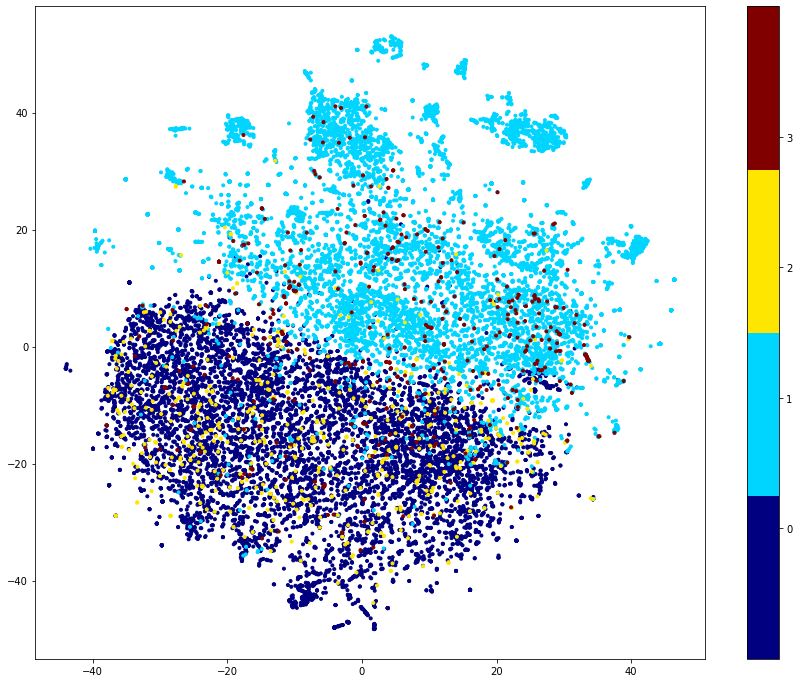

In [11]:
# 0，1，2，3：训练集非谣言，训练集谣言，测试集非谣言，测试集谣言
plt.figure(figsize=(15,12))
plt.scatter(vis_x, vis_y, c=target_all, cmap=plt.cm.get_cmap("jet", 4), marker='.')
plt.colorbar(ticks=range(4))
plt.clim(-1, 4)
plt.show()

## 抽出测试集可视化

In [12]:
embeddings_test=embeddings_all[17670:]
target2=np.load('./ft-feature/test_label.npy')[:,0]+2
print(embeddings_test.shape)
print(target2.shape)
vis_x = embeddings_test[:, 0]
vis_y = embeddings_test[:, 1]

(967, 2)
(967,)


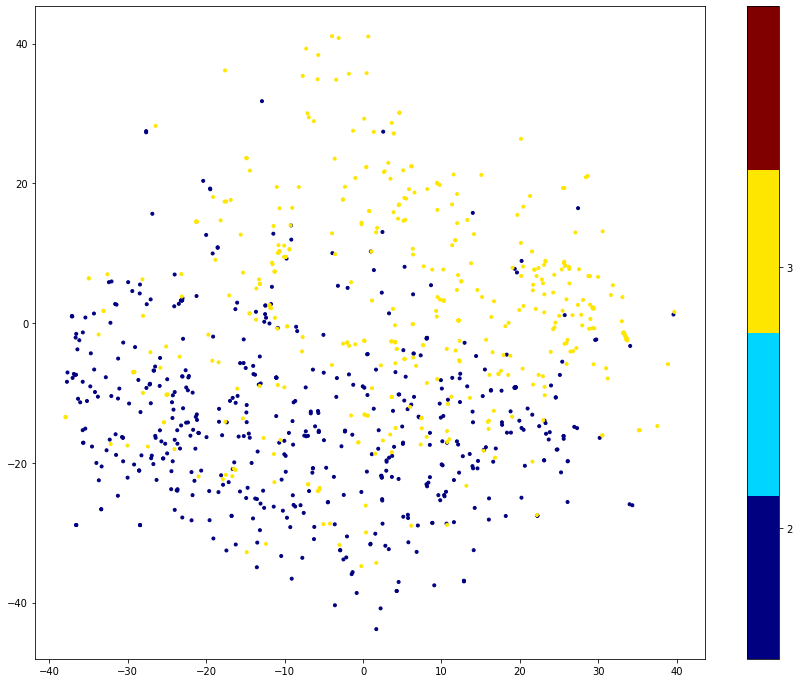

In [13]:
plt.figure(figsize=(15,12))
plt.scatter(vis_x, vis_y, c=target2, cmap=plt.cm.get_cmap("jet", 4), marker='.')
plt.colorbar(ticks=range(4))
plt.clim(1.5, 4)
plt.show()

### 错误1
Error : Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. 
### 加上下面的程序：
from tensorflow.compat.v1 import ConfigProto

from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()

config.gpu_options.allow_growth = True

session = InteractiveSession(config=config)
